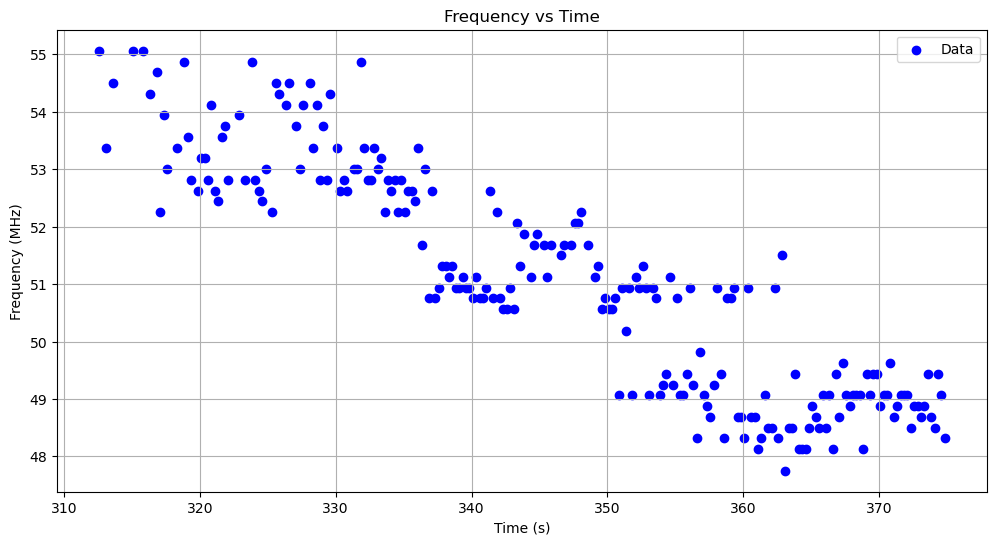

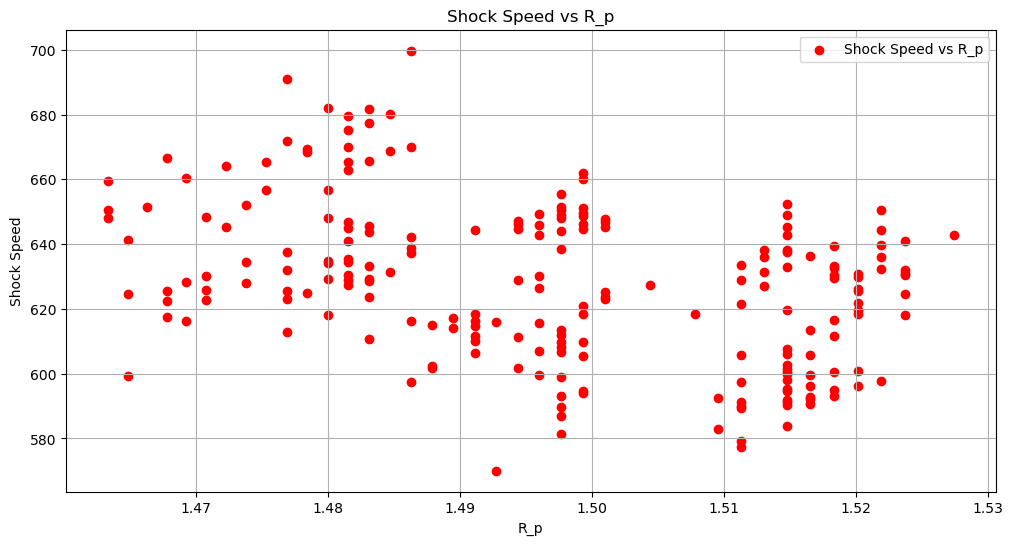

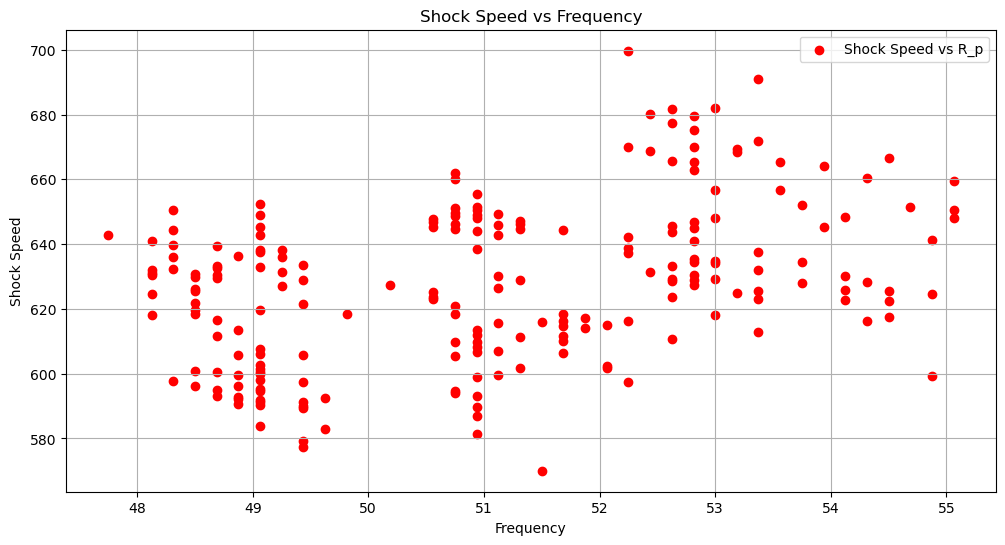

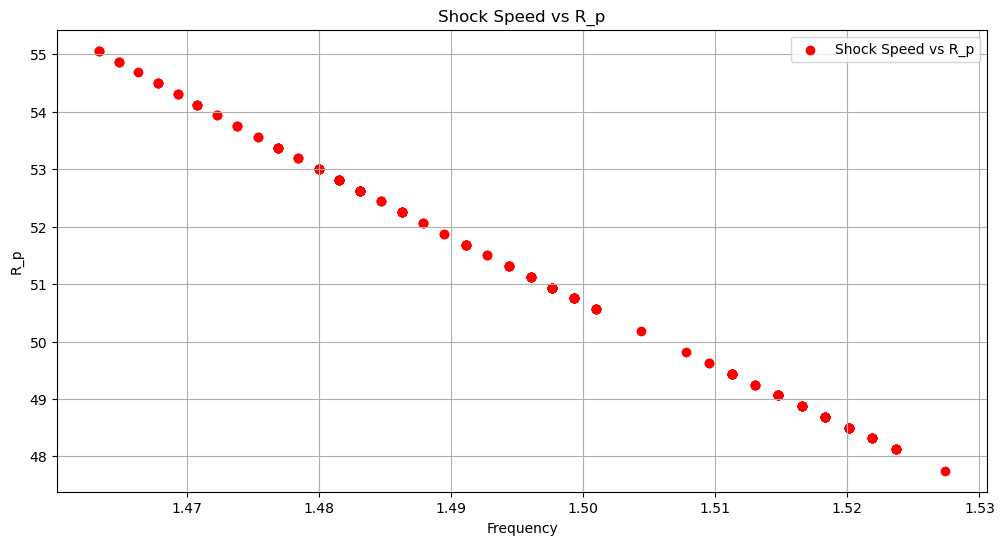

Average Drift Rate: -0.10238074176243968 ± 0.0005900484009676324
Threshold Frequency: 53.75 ± 0.8268037098050558
Estimated Initial Shock Speed: 652.1934773575463 ± 85.36650715299022
Estimated Initial Source Height: 1.473799999416503 ± 0.009162441805572958


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the dataset
file_path = '/Users/saan/Desktop/Academic/Research/Data/Selected Data/Type II/Data CSV/Fundemental Frequencies/Fundamental_SRI-Lanka_20211009_064500_59.fit.gz.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Plotting Frequency vs Time
plt.figure(figsize=(12, 6))
plt.scatter(data['time'], data['frequency'], color='blue', label='Data')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (MHz)')
plt.title('Frequency vs Time')
plt.legend()
plt.grid(True)
plt.show()

# Function for the model y = ax^(-b)
def model_func(x, a, b):
    return a * x ** (-b)

# Curve fitting
params, covariance = curve_fit(model_func, data['time'], data['frequency'], maxfev=10000)
a, b = params
std_errs = np.sqrt(np.diag(covariance))

# Calculating the drift rate
def drift_rate(x, a, b):
    return -a * b * x ** (-(b + 1))

drift_rate_values = drift_rate(data['time'], a, b)
drift_rate_errors = np.abs(drift_rate_values) * np.sqrt((std_errs[0]/a)**2 + (std_errs[1]/b)**2)

# Calculating shock speed
shock_speed = (13853221.38 * np.abs(drift_rate_values)) / (data['frequency'] * (np.log(data['frequency'] ** 2 / 3.385)) ** 2)
shock_speed = np.array(shock_speed)

#shock_speed = (2*696340*13.83*np.abs(drift_rate_values))/(data['frequency']*(13.83+np.log(2.414e-6*(data['frequency'] ** 2))))
#shock_speed = np.array(shock_speed)



# Calculating R_p
R_p = 4.32 * np.log(10) / np.log(data['frequency'] ** 2 / 3.385)
R_p = np.array(R_p)

#R_p = 13.83/(13.83+(13.83+np.log(2.414e-6*(data['frequency'] ** 2))))
#R_p = np.array(R_p)


# Plotting various relationships
# Plotting Shock Speed vs R_p
plt.figure(figsize=(12, 6))
plt.scatter(R_p, shock_speed, color='red', label='Shock Speed vs R_p')
plt.xlabel('R_p')
plt.ylabel('Shock Speed')
plt.title('Shock Speed vs R_p')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(data['frequency'], shock_speed, color='red', label='Shock Speed vs R_p')
plt.xlabel('Frequency')
plt.ylabel('Shock Speed')
plt.title('Shock Speed vs Frequency')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter( R_p, data['frequency'], color='red', label='Shock Speed vs R_p')
plt.xlabel('Frequency')
plt.ylabel('R_p')
plt.title('Shock Speed vs R_p')
plt.legend()
plt.grid(True)
plt.show()


# Similar plots for R_p vs Frequency, R_p vs Time, and R_p vs Frequency Drift can be added here

# Applying the percentile threshold method for estimating the initial shock speed
percentile_threshold = 90  # High percentile for starting frequencies
threshold_frequency = np.percentile(data['frequency'], percentile_threshold)
closest_frequency_idx = (np.abs(data['frequency'] - threshold_frequency)).argmin()
estimated_shock_speed = shock_speed[closest_frequency_idx]
estimated_source_height = R_p[closest_frequency_idx]

# Calculate residuals
residuals = data['frequency'] - model_func(data['time'], a, b)
# Estimate the standard deviation of the residuals
frequency_measurement_error = np.std(residuals)

# Calculate error in shock speed
shock_speed_error = np.mean(np.abs(shock_speed) * np.sqrt((drift_rate_errors / drift_rate_values) ** 2 +(2 * frequency_measurement_error / data['frequency']) ** 2))
# Calculating error in R_p
dRp_dFrequency = (8.64 / data['frequency']) / np.log(10) / np.log(data['frequency'] ** 2 / 3.385)
error_R_p = np.mean(np.abs(dRp_dFrequency * frequency_measurement_error))


# Calculating the average drift rate
average_drift_rate = np.mean(drift_rate_values)
average_drift_rate_error = np.mean(np.std(drift_rate_values) / np.sqrt(len(drift_rate_values)))

print("Average Drift Rate:", average_drift_rate,"±",average_drift_rate_error)
print("Threshold Frequency:", threshold_frequency,"±",frequency_measurement_error)
print("Estimated Initial Shock Speed:", estimated_shock_speed,"±",shock_speed_error)
print("Estimated Initial Source Height:", estimated_source_height,"±",error_R_p)


In [2]:
R_p_theoretical = ((threshold_frequency + 0.14)/307.87)**(-1/3.78)
print(R_p_theoretical)

1.585722901448658
